In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import time
import os
from PIL import Image

from PIL import Image

In [5]:
folder = 'C:/Users/oryan/Documents/esac-project/cutouts/hubble-training-all'

In [6]:
manifest_paths = glob.glob(folder + '/*.csv')

In [7]:
manifest_paths

['C:/Users/oryan/Documents/esac-project/cutouts/hubble-training-all\\gzm-image-manifest.csv',
 'C:/Users/oryan/Documents/esac-project/cutouts/hubble-training-all\\hubble-thumb-manifest.csv']

In [ ]:
C:\Users\oryan\Documents\esac-project\manifests

In [39]:
manifest_gz = pd.read_csv(manifest_paths[1],index_col = 0).reset_index().rename(columns={'index':'zooniverse_id'})
manifest_gzm = pd.read_csv(manifest_paths[0],index_col = 0).reset_index().rename(columns={'index':'zooniverse_id','thumbnail_loc':'thumbnail_path'})
manifest_gz_answer = pd.read_csv('C:/Users/oryan/Documents/esac-project/manifests/gz-hubble-local-manifest.csv',index_col = 0)[['zooniverse_id','interacting']]

### Combining the GZ and GZM Manifest

In [40]:
manifest_gz_answer

,zooniverse_id,interacting
5895,AHZ10004js,1
8646,AHZ20000ak,1
8813,AHZ20000f7,1
8875,AHZ20000gx,1
8897,AHZ20000hj,1
...,...,...
82467,AHZ2001l95,0
42067,AHZ2000q2x,0
21547,AHZ2000a8x,0
26668,AHZ2000e76,0


In [41]:
manifest_gz_merg = manifest_gz.merge(manifest_gz_answer, on='zooniverse_id',how='left')

In [42]:
manifest_gz_merg

,zooniverse_id,thumbnail_path,interacting
0,AHZ10004js,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
1,AHZ20000ak,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
2,AHZ20000f7,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
3,AHZ20000gx,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
4,AHZ20000hj,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
...,...,...,...
545,AHZ2001l95,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0
546,AHZ2000q2x,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0
547,AHZ2000a8x,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0
548,AHZ2000e76,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0


In [43]:
manifest_gzm_ans = manifest_gzm.assign(interacting = 1)

In [44]:
manifest_all = pd.concat([manifest_gz_merg, manifest_gzm_ans])

In [45]:
manifest_all

,zooniverse_id,thumbnail_path,interacting
0,AHZ10004js,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
1,AHZ20000ak,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
2,AHZ20000f7,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
3,AHZ20000gx,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
4,AHZ20000hj,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
...,...,...,...
10,Arp256_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
11,Arp214_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
12,Arp239_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
13,Arp302_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1


In [48]:
manifest_all_local = (
    manifest_all
    .assign(local_path = manifest_all.thumbnail_path.apply(lambda x: f'{folder}/{os.path.basename(x)}'))
)

### Loop Through Manifest

In [60]:
manifest_all_local["my_interacting"] = ""

In [61]:
counter = 0

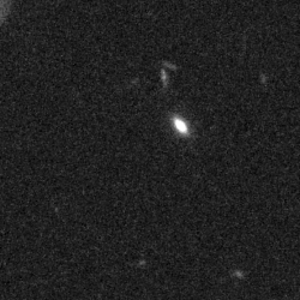

In [62]:
path = manifest_all_local.local_path.iloc[0]
im = Image.open(path)
im